# Submissions

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier


In [2]:
import os
os.getcwd()
os.listdir()

['.git',
 'catboost_info',
 'Data',
 'EDA DIKENS.ipynb',
 'Exploration.ipynb',
 'First Try',
 'Forest_notebook_rehan.ipynb',
 'Models.ipynb',
 'Models_Kaan.ipynb',
 'README.md',
 'submission11.csv',
 'submission12.csv',
 'submissions']

In [3]:
df = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test-full.csv")

In [4]:
def aggregate_one_hot(df=df, new_colname="soil_types", regex_="Soil_Type", drop=False):
    """
    regex_ --> regex to filter desired onehot encoded columns to switch to categorical from df
    drop --> drop the one hot encoded columns or not
    """
    #Check if soil types are mutually exclusive
    soil_types = df.filter(regex=regex_)
    soil_types.sum().sum(), df.shape[0]

    # Get the column names of the original categorical variables
    original_cols = soil_types.columns

    # Get the names of the new categorical variables
    new_cols = [i for i in soil_types.columns]

    # Create a dictionary to map the original column names to the new categorical variables
    mapping_dict = {col: new_col for col, new_col in zip(original_cols, new_cols)}

    # Apply the mapping to the dataframe
    df[f'{new_colname}'] = soil_types.idxmax(axis=1).map(mapping_dict)

    # Drop the dummy encoded variables
    if drop == True:
        df = df.drop(original_cols, axis=1)
    return df


In [5]:
climatic_zone = {
            "lower_montane_dry":[],
            "lower_montane":[1,2,3,4,5,6],
            "montane_dry":[7,8],
            "montane":[9,10,11,12,13],
            "montane_dry_and_montane":[14,15],
            "montane_and_subalpine":[16,17,18],
            "subalpine":list(range(19,35)),
            "alpine":[35,36,37,38,39,40]
                 }

geologic_zone = {
          "alluvium":[14,15,16,17,19,20,21],
          "glacial":[9,22,23],
          "shale":[],
          "sandstone":[],
          "mixed_sedimentary":[7,8],
          "unspecified":[], 
          "igneous_metamorphic":[item for sublist in [list((range(1,7))), list(range(10,14)), [18], list(range(24,41))] for item in sublist],
          "volcanic":[]
          }

#verify their length
length = 0
for i in climatic_zone.values():
     length += len(i)
if length != 40:
     print("length mismatch")
length = 0
for i in geologic_zone.values():
     length += len(i)
if length != 40:
     print("length mismatch")


In [6]:
#create new zones merging these 2 properties
import itertools
categories = list(itertools.product(climatic_zone.keys(),geologic_zone.keys()))  
categories = {k: [] for k in categories}

for cat in categories.keys():
  #print(cat[0],cat[1])
  clim = climatic_zone[cat[0]]
  geo = geologic_zone[cat[1]]
  for i in range(41):
    if i in clim and i in geo:
      categories[cat].append(i)


length = 0
for i in categories.values():
  length += len(i)
print(length)
categories_filt = {k: v for k, v in categories.items() if len(v) != 0}


#group soil_types based on numbers here
# Dictionary containing columns to be grouped
data = df.filter(regex="Soil_Type")

# Group the columns using the dictionary
#grouped_data = np.zeros((data.shape[0], len(categories_filt)))
grouped_data = pd.DataFrame()

for i, (group_name, group_cols) in enumerate(categories_filt.items()):
    
    col_names = [f"Soil_Type{i}" for i in group_cols]
    grouped_data[group_name] = data.loc[:, col_names].sum(axis=1)

#verify count of new data
print("must be same length as data: ", grouped_data.sum(axis=1).sum())

#df_alt = df.drop(columns=data.columns)
#df_alt = df_alt.join(grouped_data) 
df_alt = df.join(grouped_data)
display(df_alt)

40
must be same length as data:  15120


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,"(montane_dry, mixed_sedimentary)","(montane, glacial)","(montane, igneous_metamorphic)","(montane_dry_and_montane, alluvium)","(montane_and_subalpine, alluvium)","(montane_and_subalpine, igneous_metamorphic)","(subalpine, alluvium)","(subalpine, glacial)","(subalpine, igneous_metamorphic)","(alpine, igneous_metamorphic)"
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,1,0
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,1,0
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,1,0
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,1,0,0
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,475155,3328,321,13,323,12,5109,186,227,180,...,0,0,0,0,0,0,0,0,0,1
15116,514378,3455,37,5,841,92,939,220,229,146,...,0,0,0,0,0,0,0,0,0,1
15117,368425,3279,90,14,404,113,1513,240,218,105,...,0,0,0,0,0,0,0,0,1,0
15118,537844,3589,357,9,418,52,1868,205,223,155,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#Do the same transformation for test data

#group soil_types based on numbers here
# Dictionary containing columns to be grouped
data = df_test.filter(regex="Soil_Type")

# Group the columns using the dictionary
#grouped_data = np.zeros((data.shape[0], len(categories_filt)))
grouped_data = pd.DataFrame()

for i, (group_name, group_cols) in enumerate(categories_filt.items()):
    
    col_names = [f"Soil_Type{i}" for i in group_cols]
    grouped_data[group_name] = data.loc[:, col_names].sum(axis=1)

#verify count of new data
print("must be same length as data: ", grouped_data.sum(axis=1).sum())

#df_test_alt = df_test.drop(columns=data.columns)
#df_test_alt = df_test_alt.join(grouped_data) 
df_test_alt = df_test.join(grouped_data)
display(df_test_alt)

must be same length as data:  581012


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,"(montane_dry, mixed_sedimentary)","(montane, glacial)","(montane, igneous_metamorphic)","(montane_dry_and_montane, alluvium)","(montane_and_subalpine, alluvium)","(montane_and_subalpine, igneous_metamorphic)","(subalpine, alluvium)","(subalpine, glacial)","(subalpine, igneous_metamorphic)","(alpine, igneous_metamorphic)"
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,1,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,1,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,1,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,1,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,581008,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,0
581008,581009,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,0
581009,581010,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,0
581010,581011,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#fix feature names
cond = [(type(i) == tuple) for i in df_alt.columns]
cols_to_change = df_alt.columns[cond]
new_colnames = ["__".join(i) for i in cols_to_change]

col_dict = {k: v for k, v in zip(cols_to_change, new_colnames)}
df_alt = df_alt.rename(columns=col_dict)
df_test_alt = df_test_alt.rename(columns=col_dict)

In [9]:
df.shape, df_alt.shape, df_test_alt.shape

((15120, 56), (15120, 67), (581012, 66))

In [10]:
def preprocess_and_engineer_features(df_train):
    # Apply preprocessing and feature engineering steps here
    # Create a new feature for total distance to hydrology
    df_train["Total_Distance_To_Hydrology"] = np.sqrt(df_train["Horizontal_Distance_To_Hydrology"]**2 + df_train["Vertical_Distance_To_Hydrology"]**2)
    # Create a new feature for mean distance to amenities
    df_train["Mean_Distance_To_Amenities"] = (df_train["Horizontal_Distance_To_Hydrology"] + df_train["Horizontal_Distance_To_Roadways"])/2
    # Create a new feature for total hillshade
    df_train["Total_Hillshade"] =df_train["Hillshade_9am"] + df_train["Hillshade_Noon"] + df_train["Hillshade_3pm"]
    # Create a new feature called "slope_aspect_interaction"
    df_train["slope_aspect_interaction"] = df_train["Slope"] * df_train["Aspect"]
    # Create a new column for the binned Elevation values
    df_train["Elevation_binned"] = pd.qcut(df_test["Elevation"], q=np.linspace(0,1,10))
    # Convert 'Elevation_binned' column to its midpoint
    df_train['Elevation_binned'] = df_train['Elevation_binned'].apply(lambda x: int(x.mid))

    # Define bin edges for each 45-degree interval
    bin_edges = np.array([0, 45, 90, 135, 180, 225, 270, 315, 360])
    # Define bin labels for each 45-degree interval
    bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    # Convert aspect to categorical feature based on bin intervals
    df_train['Aspect_cat'] = pd.cut(df_train['Aspect'], bins=bin_edges, labels=bin_labels, include_lowest=True)
    #Euclidean distance to amenities: Calculate the Euclidean distance to the nearest roadways and fire points.
    df_train["Distance_To_Roadways"] = np.sqrt((df_train["Horizontal_Distance_To_Roadways"]**2) + (df_train["Vertical_Distance_To_Hydrology"]**2))
    df_train["Distance_To_Fire_Points"] = np.sqrt((df_train["Horizontal_Distance_To_Fire_Points"]**2) + (df_train["Vertical_Distance_To_Hydrology"]**2))
    #Average hillshade: Calculate the average hillshade value instead of the total hillshade.
    df_train["Average_Hillshade"] = df_train["Total_Hillshade"] / 3
    #Elevation divided by the total distance to hydrology: This feature might capture the relationship between elevation and the distance to hydrology.
    #df_train["Elevation_div_Hydrology"] = df_train["Elevation"] / df_train["Total_Distance_To_Hydrology"]
    #Elevation multiplied by the aspect: This feature might capture the relationship between elevation and the aspect.
    df_train["Elevation_mult_Aspect"] = df_train["Elevation"] * df_train["Aspect"]
    #Slope multiplied by the hillshade: This feature might capture the relationship between slope and hillshade
    df_train["Slope_mult_Hillshade"] = df_train["Slope"] * df_train["Average_Hillshade"]
    
    df_train['Euclidian_Distance_To_Hydrology'] = (df_train['Horizontal_Distance_To_Hydrology']**2 + df_train['Vertical_Distance_To_Hydrology']**2)**0.5
    df_train['Mean_Elevation_Vertical_Distance_Hydrology'] = (df_train['Elevation'] + df_train['Vertical_Distance_To_Hydrology'])/2
    df_train['Mean_Distance_Hydrology_Firepoints'] = (df_train['Horizontal_Distance_To_Hydrology'] + df_train['Horizontal_Distance_To_Fire_Points'])/2
    df_train['Mean_Distance_Hydrology_Roadways'] = (df_train['Horizontal_Distance_To_Hydrology'] + df_train['Horizontal_Distance_To_Roadways'])/2
    df_train['Mean_Distance_Firepoints_Roadways'] = (df_train['Horizontal_Distance_To_Fire_Points'] + df_train['Horizontal_Distance_To_Roadways'])/2
    
    #added by Kaan
    df_train['slope_hyd'] = np.sqrt(df_train.Vertical_Distance_To_Hydrology**2 + \
     df_train.Horizontal_Distance_To_Hydrology**2) 

    df_train["slope_hyd"] = df_train.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) 
    df_train['slope_hyd_pct'] = df_train.Vertical_Distance_To_Hydrology / df_train.Horizontal_Distance_To_Hydrology 
    df_train["slope_hyd_pct"] =df_train.slope_hyd_pct.map(lambda x: 0 if np.isnan(x) else x)
    
    #Elevation adjusted by Horizontal distance to Roadways 
    df_train['Elev_to_HD_Road']=df_train.Elevation - 0.05 * df_train.Horizontal_Distance_To_Roadways 

    #Elevation adjusted by Vertical distance to Roadways 
    df_train['Elev_to_VD_Hyd']= df_train.Elevation - df_train.Vertical_Distance_To_Hydrology 
    
    # One-hot encoding for the 'Aspect_cat' column
    one_hot_encoder = OneHotEncoder(sparse=False)
    aspect_cat_encoded = one_hot_encoder.fit_transform(df_train[['Aspect_cat']])
    aspect_cat_columns = [f"Aspect_cat_{cat}" for cat in one_hot_encoder.categories_[0]]
    df_aspect_cat_encoded = pd.DataFrame(aspect_cat_encoded, columns=aspect_cat_columns, index=df_train.index)
    df_train = pd.concat([df_train.drop('Aspect_cat', axis=1), df_aspect_cat_encoded], axis=1)

    float_columns =['Total_Distance_To_Hydrology', 'Mean_Distance_To_Amenities','Aspect_cat_E', 'Aspect_cat_N', 'Aspect_cat_NE', 'Aspect_cat_NW',
       'Aspect_cat_S', 'Aspect_cat_SE', 'Aspect_cat_SW', 'Aspect_cat_W','Distance_To_Roadways',
       'Distance_To_Fire_Points', 'Average_Hillshade','Slope_mult_Hillshade','Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways', 'Mean_Distance_Firepoints_Roadways']
    #print(df_train.columns.isin(float_columns))
    #df_train[float_columns] = df_train[float_columns].astype(int)
    
    return df_train

df_alt = preprocess_and_engineer_features(df_alt)
df_test_alt = preprocess_and_engineer_features(df_test_alt)
df_alt.shape, df_test_alt.shape

((15120, 94), (581012, 93))

In [11]:
y = df_alt.pop("Cover_Type")
X = df_alt.copy()
y.shape, X.shape

((15120,), (15120, 93))

In [12]:
X_test = df_test_alt.copy()

In [13]:
i = df_alt.Elevation_binned[df_alt.Elevation_binned.isna()].index
print(df_alt.Elevation[i])
df_alt.Elevation_binned[df_alt.Elevation_binned.isna()]

Series([], Name: Elevation, dtype: int64)


Series([], Name: Elevation_binned, dtype: category
Categories (9, int64): [2231 < 2690 < 2833 < 2927 ... 3067 < 3144 < 3222 < 3560])

### CATBOOST


In [14]:

cat = CatBoostClassifier(
                        cat_features=["Elevation_binned"]
                        )
cat.fit(X, y)

Learning rate set to 0.090883
0:	learn: 1.7024960	total: 228ms	remaining: 3m 47s
1:	learn: 1.5350461	total: 334ms	remaining: 2m 46s
2:	learn: 1.4175479	total: 429ms	remaining: 2m 22s
3:	learn: 1.3150648	total: 554ms	remaining: 2m 17s
4:	learn: 1.2295790	total: 638ms	remaining: 2m 6s
5:	learn: 1.1634047	total: 736ms	remaining: 2m 2s
6:	learn: 1.1082863	total: 820ms	remaining: 1m 56s
7:	learn: 1.0554659	total: 917ms	remaining: 1m 53s
8:	learn: 1.0126754	total: 1.01s	remaining: 1m 50s
9:	learn: 0.9733796	total: 1.09s	remaining: 1m 48s
10:	learn: 0.9362906	total: 1.2s	remaining: 1m 47s
11:	learn: 0.9018718	total: 1.28s	remaining: 1m 45s
12:	learn: 0.8683355	total: 1.36s	remaining: 1m 43s
13:	learn: 0.8428629	total: 1.45s	remaining: 1m 41s
14:	learn: 0.8182070	total: 1.54s	remaining: 1m 41s
15:	learn: 0.7967472	total: 1.63s	remaining: 1m 40s
16:	learn: 0.7764436	total: 1.73s	remaining: 1m 39s
17:	learn: 0.7584099	total: 1.81s	remaining: 1m 38s
18:	learn: 0.7400328	total: 1.89s	remaining: 1m

In [16]:
X.dtypes[X.dtypes != X_test.dtypes]

Series([], dtype: object)

In [17]:
y_pred = cat.predict(X_test)

#### Limit features

In [30]:
features = pd.Series(cat.feature_importances_,
                    index=cat.feature_names_).sort_values(ascending=False)



In [54]:
X.loc[:, X.nunique() > 10].columns.to_list()

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Total_Distance_To_Hydrology',
 'Mean_Distance_To_Amenities',
 'Total_Hillshade',
 'slope_aspect_interaction',
 'Distance_To_Roadways',
 'Distance_To_Fire_Points',
 'Average_Hillshade',
 'Elevation_mult_Aspect',
 'Slope_mult_Hillshade',
 'Euclidian_Distance_To_Hydrology',
 'Mean_Elevation_Vertical_Distance_Hydrology',
 'Mean_Distance_Hydrology_Firepoints',
 'Mean_Distance_Hydrology_Roadways',
 'Mean_Distance_Firepoints_Roadways',
 'slope_hyd',
 'slope_hyd_pct',
 'Elev_to_HD_Road',
 'Elev_to_VD_Hyd']

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

to_use = features[:60].index
number_cols = X.loc[:, X.nunique() > 10].columns.to_list()

cat = CatBoostClassifier()

preprocessor = ColumnTransformer([("stscale", StandardScaler(), number_cols)])

pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", cat)
        ])


params = {
    "model__learning_rate": [0.1,0.2]
}

search = GridSearchCV(pipe, params,cv=3, n_jobs=2, verbose=3) 

search.fit(X.loc[:, to_use], y)

y_pred = search.predict(X_test)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
0:	learn: 1.5546341	total: 79.7ms	remaining: 1m 19s
1:	learn: 1.3549329	total: 120ms	remaining: 60s
2:	learn: 1.2112048	total: 158ms	remaining: 52.7s
3:	learn: 1.1073591	total: 202ms	remaining: 50.2s
4:	learn: 1.0350204	total: 241ms	remaining: 48s
5:	learn: 0.9743524	total: 283ms	remaining: 46.8s
6:	learn: 0.9228934	total: 328ms	remaining: 46.5s
7:	learn: 0.8854531	total: 380ms	remaining: 47.1s
8:	learn: 0.8465503	total: 425ms	remaining: 46.8s
9:	learn: 0.8129039	total: 465ms	remaining: 46s
10:	learn: 0.7889833	total: 510ms	remaining: 45.9s
11:	learn: 0.7694627	total: 557ms	remaining: 45.9s
12:	learn: 0.7447635	total: 601ms	remaining: 45.6s
13:	learn: 0.7296360	total: 645ms	remaining: 45.4s
14:	learn: 0.7130118	total: 684ms	remaining: 44.9s
15:	learn: 0.6983767	total: 728ms	remaining: 44.8s
16:	learn: 0.6879866	total: 771ms	remaining: 44.6s
17:	learn: 0.6797611	total: 820ms	remaining: 44.7s
18:	learn: 0.6736635	total: 865ms	rem

In [69]:
to_use = features[:70].index
number_cols = X.loc[:, X.nunique() > 10].columns.to_list()

cat = CatBoostClassifier()

preprocessor = ColumnTransformer([("stscale", StandardScaler(), number_cols)])

pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", cat)
        ])
pipe.fit(X.loc[:, to_use], y)


Learning rate set to 0.090883
0:	learn: 1.7548716	total: 56ms	remaining: 56s
1:	learn: 1.6090258	total: 89.1ms	remaining: 44.5s
2:	learn: 1.4977286	total: 122ms	remaining: 40.5s
3:	learn: 1.4049752	total: 158ms	remaining: 39.4s
4:	learn: 1.3320039	total: 192ms	remaining: 38.2s
5:	learn: 1.2709876	total: 228ms	remaining: 37.7s
6:	learn: 1.2192156	total: 273ms	remaining: 38.7s
7:	learn: 1.1707947	total: 320ms	remaining: 39.7s
8:	learn: 1.1304446	total: 371ms	remaining: 40.8s
9:	learn: 1.0907461	total: 419ms	remaining: 41.5s
10:	learn: 1.0554892	total: 474ms	remaining: 42.6s
11:	learn: 1.0239771	total: 543ms	remaining: 44.7s
12:	learn: 0.9963819	total: 600ms	remaining: 45.5s
13:	learn: 0.9706757	total: 644ms	remaining: 45.4s
14:	learn: 0.9457046	total: 701ms	remaining: 46s
15:	learn: 0.9235774	total: 762ms	remaining: 46.9s
16:	learn: 0.9025388	total: 820ms	remaining: 47.4s
17:	learn: 0.8843057	total: 878ms	remaining: 47.9s
18:	learn: 0.8689676	total: 941ms	remaining: 48.6s
19:	learn: 0.85

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('stscale', StandardScaler(),
                                                  ['Id', 'Elevation', 'Aspect',
                                                   'Slope',
                                                   'Horizontal_Distance_To_Hydrology',
                                                   'Vertical_Distance_To_Hydrology',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Hillshade_9am',
                                                   'Hillshade_Noon',
                                                   'Hillshade_3pm',
                                                   'Horizontal_Distance_To_Fire_Points',
                                                   'Total_Distance_To_Hydrology',
                                                   'Mean_D...
                                                   'Sl

In [70]:
y_pred = pipe.predict(X_test)

In [40]:
#submission
def submission(nr, y_pred):
    sub = pd.read_csv("Data/full_submission.csv")
    sub["Cover_Type"] = y_pred
    sub.to_csv(f"submission{nr}.csv", index=False)
    return sub["Cover_Type"].value_counts()

submission(12, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


# XGBOOST

In [14]:
import xgboost
from xgboost import XGBClassifier

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer



In [18]:
y2 = y.map(lambda x:x-1) #for XGBoost
number_cols = X.loc[:, X.nunique() > 10].columns.to_list()


In [19]:
#Preliminary model for feature importances
xgb = XGBClassifier()

preprocessor = ColumnTransformer([("stscale", StandardScaler(), number_cols)])

pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", xgb)
        ])
pipe.fit(X, y2)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('stscale', StandardScaler(),
                                                  ['Id', 'Elevation', 'Aspect',
                                                   'Slope',
                                                   'Horizontal_Distance_To_Hydrology',
                                                   'Vertical_Distance_To_Hydrology',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Hillshade_9am',
                                                   'Hillshade_Noon',
                                                   'Hillshade_3pm',
                                                   'Horizontal_Distance_To_Fire_Points',
                                                   'Total_Distance_To_Hydrology',
                                                   'Mean_D...
                               feature_types=None, gam

<AxesSubplot: >

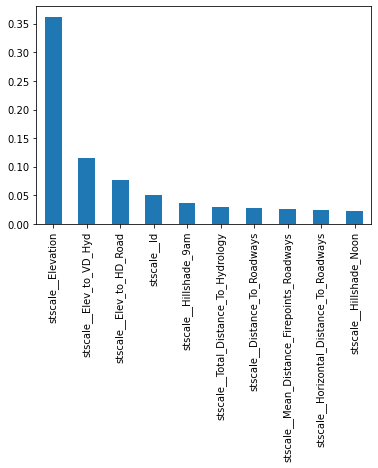

In [20]:
importances = pipe.named_steps['model'].feature_importances_
feature_names = pipe.named_steps['preprocess'].get_feature_names_out()

importances = pd.Series(importances,
                    index=feature_names).sort_values(ascending=False)

importances[:10].plot(kind="bar")


In [60]:
to_use = importances[:50].index
to_use = to_use.map(lambda x:x[9:])
to_use


Index(['Elevation', 'Elev_to_VD_Hyd', 'Elev_to_HD_Road', 'Id', 'Hillshade_9am',
       'Total_Distance_To_Hydrology', 'Distance_To_Roadways',
       'Mean_Distance_Firepoints_Roadways', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Fire_Points',
       'Mean_Distance_Hydrology_Firepoints', 'Elevation_mult_Aspect',
       'Distance_To_Fire_Points', 'Mean_Elevation_Vertical_Distance_Hydrology',
       'slope_aspect_interaction', 'Mean_Distance_To_Amenities', 'Aspect',
       'Total_Hillshade', 'Hillshade_3pm', 'Slope', 'Slope_mult_Hillshade',
       'slope_hyd_pct', 'Vertical_Distance_To_Hydrology', 'Average_Hillshade',
       'Euclidian_Distance_To_Hydrology', 'Mean_Distance_Hydrology_Roadways',
       'slope_hyd'],
      dtype='object')

In [61]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier()
Xlim = X.loc[:,to_use].copy()
preprocessor = ColumnTransformer([("stscale", StandardScaler(), number_cols)])

pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", xgb)
        ])


params = {
    "model__learning_rate": [0.05,0.1,0.2,0.3],
    "model__grow_policy": ['depthwise', 'lossguide'],
    "model__n_estimators": [80, 100, 120, 160, 200],
    "model__max_depth": [4, 6, 8]
}

search = RandomizedSearchCV(pipe, params,cv=3, n_jobs=3, verbose=3, n_iter=40) 

search.fit(Xlim, y2)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('stscale',
                                                                               StandardScaler(),
                                                                               ['Id',
                                                                                'Elevation',
                                                                                'Aspect',
                                                                                'Slope',
                                                                                'Horizontal_Distance_To_Hydrology',
                                                                                'Vertical_Distance_To_Hydrology',
                                                                                'Horizontal_Distance_To_Roadways',
                         

In [62]:
search.best_score_

0.8887566137566137

In [63]:
idx = pd.Series(search.best_params_).index.map(lambda x:x[7:])
param_dict = {k[7:]: v for k,v in search.best_params_.items()}
param_dict 

{'n_estimators': 200,
 'max_depth': 8,
 'learning_rate': 0.2,
 'grow_policy': 'depthwise'}

In [69]:
xgb = XGBClassifier(**param_dict)

pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", xgb)
        ])

pipe.fit(Xlim, y2)
y_pred = pipe.predict(X_test.loc[:,to_use])
y_pred = np.vectorize(lambda x:x+1)(y_pred)

submission("XGB1", y_pred)


2    245990
1    211763
3     37834
7     31666
5     26475
6     23554
4      3730
Name: Cover_Type, dtype: int64

array([5, 5, 2, ..., 3, 3, 3], dtype=int64)

In [123]:
nans = X.isna().sum()
nans[nans != 0].index

Index(['slope_hyd_pct'], dtype='object')

In [ ]:
y_pred = search.predict(X_test)